In [99]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
total_emp = pd.read_csv('./total_emp.csv', index_col=0)
total_emp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43972 entries, 0 to 47076
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43972 non-null  int64  
 1   LOCATION        43972 non-null  object 
 2   Country         43972 non-null  object 
 3   SUBJECT         43972 non-null  object 
 4   Subject         43972 non-null  object 
 5   MEASURE         43972 non-null  object 
 6   Measure         43972 non-null  object 
 7   TIME            43972 non-null  int64  
 8   Time            43972 non-null  int64  
 9   Unit Code       43972 non-null  object 
 10  Unit            43972 non-null  object 
 11  PowerCode Code  43972 non-null  int64  
 12  PowerCode       43972 non-null  object 
 13  Value           43972 non-null  float64
dtypes: float64(1), int64(4), object(9)
memory usage: 5.0+ MB


In [100]:
del_columns =['Unnamed: 0', 'LOCATION', 'MEASURE', 'TIME', 'PowerCode Code']
data = total_emp.drop(columns=del_columns)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43972 entries, 0 to 47076
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    43972 non-null  object 
 1   SUBJECT    43972 non-null  object 
 2   Subject    43972 non-null  object 
 3   Measure    43972 non-null  object 
 4   Time       43972 non-null  int64  
 5   Unit Code  43972 non-null  object 
 6   Unit       43972 non-null  object 
 7   PowerCode  43972 non-null  object 
 8   Value      43972 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 4.4+ MB


In [102]:
data['Subject'].unique()

array(['Gross Domestic Product (GDP); millions',
       'GDP per head of population', 'GDP per hour worked',
       'GDP per person employed',
       'Hours worked for total employment; millions',
       'Gap in GDP per hour worked with respect to the USA',
       'Total population; persons; thousands',
       'Gap in GDP per capita with respect to the USA',
       'Total employment (number of persons employed); thousands',
       'Gap in labour utilisation with respect to the USA',
       'Average hours worked per person employed'], dtype=object)

In [103]:
values_to_exclude = ['Gross Domestic Product (GDP); millions',
       'GDP per head of population', 'GDP per hour worked','Hours worked for total employment; millions',
       'Gap in GDP per hour worked with respect to the USA',
       'Total population; persons; thousands',
       'Gap in GDP per capita with respect to the USA',
       'Total employment (number of persons employed); thousands',
       'Gap in labour utilisation with respect to the USA']
data = data.drop(data[data['Subject'].isin(values_to_exclude)].index)


In [104]:
data['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Türkiye', 'United Kingdom', 'United States', 'Brazil', 'Chile',
       'China', 'Estonia', 'India', 'Indonesia', 'Israel', 'Russia',
       'Slovenia', 'South Africa', 'Colombia', 'Latvia', 'Lithuania',
       'Costa Rica'], dtype=object)

## Voy a eliminar China pues tiene datos de GDP pero no tiene datos de horas de trabajo.

In [109]:
data = data.drop(data[data['Country'].isin(['China'])].index)

In [110]:
data.head()

,Country,SUBJECT,Subject,Measure,Time,Unit Code,Unit,PowerCode,Value
159,Australia,T_GDPEMP,GDP per person employed,"National currency, current prices",1970,NATCUR,National currency,Units,7444.066954
160,Australia,T_GDPEMP,GDP per person employed,"National currency, current prices",1971,NATCUR,National currency,Units,8024.614958
161,Australia,T_GDPEMP,GDP per person employed,"National currency, current prices",1972,NATCUR,National currency,Units,8843.872308
162,Australia,T_GDPEMP,GDP per person employed,"National currency, current prices",1973,NATCUR,National currency,Units,10431.103055
163,Australia,T_GDPEMP,GDP per person employed,"National currency, current prices",1974,NATCUR,National currency,Units,12065.475216


In [146]:
data['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Türkiye', 'United Kingdom', 'United States', 'Brazil', 'Chile',
       'Estonia', 'India', 'Indonesia', 'Israel', 'Russia', 'Slovenia',
       'South Africa', 'Colombia', 'Latvia', 'Lithuania', 'Costa Rica'],
      dtype=object)

## Para los 6 paises que tienen mejor gdp, tomando como cifra la media de los ultimos 50 años

In [115]:
data_gdp=data.loc[(data['SUBJECT']=='T_GDPEMP') & (data['Measure']=='USD, constant prices, 2015 PPPs')].sort_values(by='Value',ascending=False)
data_gdp.head()

,Country,SUBJECT,Subject,Measure,Time,Unit Code,Unit,PowerCode,Value
9915,Ireland,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2022,USD,US Dollar,Units,219137.22643
9914,Ireland,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2021,USD,US Dollar,Units,208667.40053
9913,Ireland,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2020,USD,US Dollar,Units,194803.70093
9912,Ireland,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2019,USD,US Dollar,Units,178266.21618
9911,Ireland,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2018,USD,US Dollar,Units,174075.80548


In [132]:
gdp_countries = data_gdp.groupby('Country')['Value'].agg(['sum', 'mean']).reset_index()
gdp_countries.sort_values(by='mean',ascending=False)

,Country,sum,mean
26,Luxembourg,7.005171e+06,132173.028558
39,Switzerland,5.197874e+06,98073.093653
19,Ireland,5.095565e+06,96142.729073
30,Norway,4.964431e+06,93668.511385
42,United States,4.939513e+06,93198.360627
2,Belgium,4.791297e+06,90401.821526
1,Austria,4.043838e+06,86039.111943
21,Italy,4.392762e+06,82882.307160
12,France,4.297889e+06,81092.245146
28,Netherlands,4.289334e+06,80930.834870


In [138]:
data_luxemburgo=data.loc[data['Country']=='Luxembourg']
GDP_luxemburgo=data_luxemburgo[data_luxemburgo['Measure']=='USD, constant prices, 2015 PPPs']

data_switzerland=data.loc[data['Country']=='Switzerland']
GDP_switzerland=data_switzerland[data_switzerland['Measure']=='USD, constant prices, 2015 PPPs']

data_ireland=data.loc[data['Country']=='Ireland']
GDP_ireland=data_ireland[data_ireland['Measure']=='USD, constant prices, 2015 PPPs']

data_norway=data.loc[data['Country']=='Norway']
GDP_norway=data_norway[data_norway['Measure']=='USD, constant prices, 2015 PPPs']

data_usa=data.loc[data['Country']=='United States']
GDP_usa=data_usa[data_usa['Measure']=='USD, constant prices, 2015 PPPs']

data_belgium=data.loc[data['Country']=='Belgium']
GDP_belgium=data_belgium[data_belgium['Measure']=='USD, constant prices, 2015 PPPs']

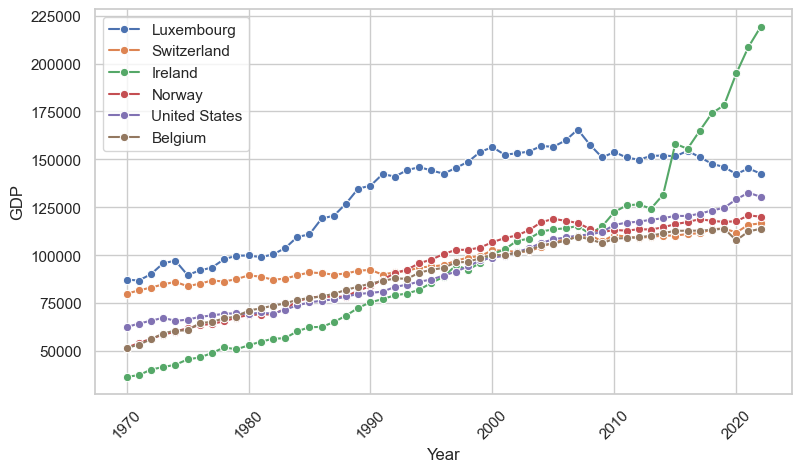

In [187]:
plt.figure(figsize=(9, 5))
ax = sns.lineplot(x="Time", y="Value", data=GDP_luxemburgo, label="Luxembourg", marker="o")
sns.lineplot(x="Time", y="Value", data=GDP_switzerland, label="Switzerland", marker="o")
sns.lineplot(x="Time", y="Value", data=GDP_ireland, label="Ireland", marker="o")
sns.lineplot(x="Time", y="Value", data=GDP_norway, label="Norway", marker="o")
sns.lineplot(x="Time", y="Value", data=GDP_usa, label="United States", marker="o")
sns.lineplot(x="Time", y="Value", data=GDP_belgium, label="Belgium", marker="o")

plt.xticks(rotation=45) 
#plt.title("GDP over time for top countries", fontsize=14)  
plt.xlabel("Year") 
plt.ylabel("GDP")  
plt.legend() 

plt.show()

## Ahora para los 6 paises con peores datos economicos, he considerado la media de GDP de los ultimos 50 años

In [136]:
data_india=data.loc[data['Country']=='India']
GDP_india=data_india[data_india['Measure']=='USD, constant prices, 2015 PPPs']

data_indonesia=data.loc[data['Country']=='Indonesia']
GDP_indonesia=data_indonesia[data_indonesia['Measure']=='USD, constant prices, 2015 PPPs']

data_colombia=data.loc[data['Country']=='Colombia']
GDP_colombia=data_colombia[data_colombia['Measure']=='USD, constant prices, 2015 PPPs']


data_brasil=data.loc[data['Country']=='Brazil']
GDP_brasil=data_brasil[data_brasil['Measure']=='USD, constant prices, 2015 PPPs']

data_costarica=data.loc[data['Country']=='Costa Rica']
GDP_costarica=data_costarica[data_costarica['Measure']=='USD, constant prices, 2015 PPPs']

data_chile=data.loc[data['Country']=='Chile']
GDP_chile=data_chile[data_chile['Measure']=='USD, constant prices, 2015 PPPs']

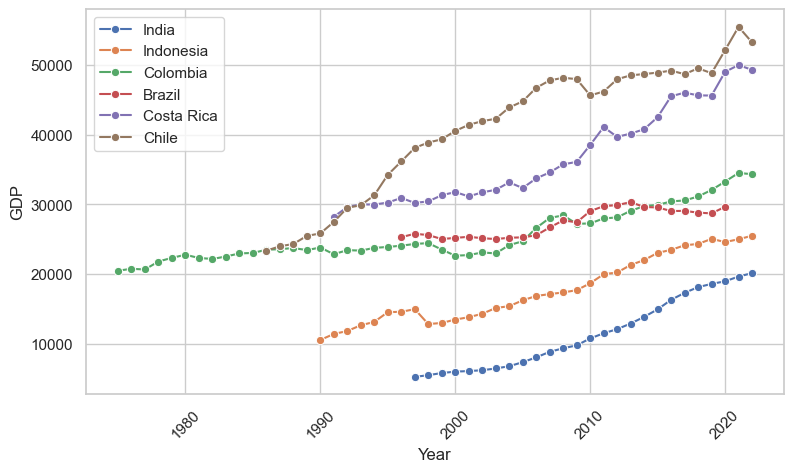

In [188]:
plt.figure(figsize=(9, 5))
ax = sns.lineplot(x="Time", y="Value", data=GDP_india, label="India", marker="o")
sns.lineplot(x="Time", y="Value", data=GDP_indonesia, label="Indonesia", marker="o")
sns.lineplot(x="Time", y="Value", data=GDP_colombia, label="Colombia", marker="o")
sns.lineplot(x="Time", y="Value", data=GDP_brasil, label="Brazil", marker="o")
sns.lineplot(x="Time", y="Value", data=GDP_costarica, label="Costa Rica", marker="o")
sns.lineplot(x="Time", y="Value", data=GDP_chile, label="Chile", marker="o")

plt.xticks(rotation=45) 
#plt.title("GDP over time for bottom countries", fontsize=14)  
plt.xlabel("Year") 
plt.ylabel("GDP")
plt.legend() 
#plt.ylim(5000, 225000)

plt.show()

## Para los 6 paises que tienen mas horas de trabajo, tomando como cifra la media de los ultimos 50 años

In [134]:
data_hrs=data.loc[data['SUBJECT']=='T_HRSAV'].sort_values(by='Value')
data_hrs.head()

,Country,SUBJECT,Subject,Measure,Time,Unit Code,Unit,PowerCode,Value
40043,Germany,T_HRSAV,Average hours worked per person employed,Persons/Hours,2020,HOUR,Hours,Units,1319.130691
40044,Germany,T_HRSAV,Average hours worked per person employed,Persons/Hours,2021,HOUR,Hours,Units,1340.165629
40045,Germany,T_HRSAV,Average hours worked per person employed,Persons/Hours,2022,HOUR,Hours,Units,1340.259063
35056,Denmark,T_HRSAV,Average hours worked per person employed,Persons/Hours,2020,HOUR,Hours,Units,1344.851329
35057,Denmark,T_HRSAV,Average hours worked per person employed,Persons/Hours,2021,HOUR,Hours,Units,1362.879134


In [135]:
hrs_countries = data_hrs.groupby('Country')['Value'].agg(['sum', 'mean']).reset_index()
hrs_countries.sort_values(by='mean')

,Country,sum,mean
35,Sweden,76841.915856,1449.847469
8,Denmark,79046.406541,1491.441633
25,Netherlands,79457.751177,1499.202852
27,Norway,79961.673673,1508.710824
12,Germany,82950.618415,1565.106008
1,Austria,44159.535634,1577.126273
38,United Kingdom,84166.039730,1588.038485
23,Luxembourg,86174.893259,1625.941382
2,Belgium,86877.445867,1639.197092
11,France,87009.747741,1641.693354


In [141]:
data_colombia=data.loc[data['Country']=='Colombia']
hrs_colombia=data_colombia[data_colombia['Measure']=='Persons/Hours']

data_costarica=data.loc[data['Country']=='Costa Rica']
hrs_costarica=data_costarica[data_costarica['Measure']=='Persons/Hours']

data_southafrica=data.loc[data['Country']=='South Africa']
hrs_southafrica=data_southafrica[data_southafrica['Measure']=='Persons/Hours']

data_mexico=data.loc[data['Country']=='Mexico']
hrs_mexico=data_mexico[data_mexico['Measure']=='Persons/Hours']

data_chile=data.loc[data['Country']=='Chile']
hrs_chile=data_chile[data_chile['Measure']=='Persons/Hours']

data_korea=data.loc[data['Country']=='Korea']
hrs_korea=data_korea[data_korea['Measure']=='Persons/Hours']



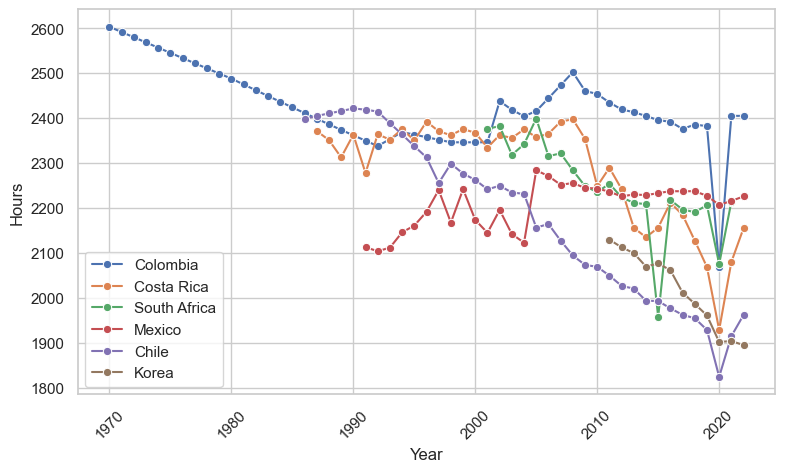

In [189]:
plt.figure(figsize=(9, 5))
ax = sns.lineplot(x="Time", y="Value", data=hrs_colombia, label="Colombia", marker="o")
sns.lineplot(x="Time", y="Value", data=hrs_costarica, label="Costa Rica", marker="o")
sns.lineplot(x="Time", y="Value", data=hrs_southafrica, label="South Africa", marker="o")
sns.lineplot(x="Time", y="Value", data=hrs_mexico, label="Mexico", marker="o")
sns.lineplot(x="Time", y="Value", data=hrs_chile, label="Chile", marker="o")
sns.lineplot(x="Time", y="Value", data=hrs_korea, label="Korea", marker="o")

plt.xticks(rotation=45) 
#plt.title("Avg. hours worked over time for bottom countries", fontsize=14)  
plt.xlabel("Year") 
plt.ylabel("Hours")  
plt.legend() 

plt.show()

## Me falta el grafico con los paises que acumulan menos horas de trabajo de media en los ultimos 50 años

In [144]:
data_sweden=data.loc[data['Country']=='Sweden']
hrs_sweden=data_sweden[data_sweden['Measure']=='Persons/Hours']

data_denmark=data.loc[data['Country']=='Denmark']
hrs_denmark=data_denmark[data_denmark['Measure']=='Persons/Hours']

data_netherlands=data.loc[data['Country']=='Netherlands']
hrs_netherlands=data_netherlands[data_netherlands['Measure']=='Persons/Hours']

data_norway=data.loc[data['Country']=='Norway']
hrs_norway=data_norway[data_norway['Measure']=='Persons/Hours']

data_germany=data.loc[data['Country']=='Germany']
hrs_germany=data_germany[data_germany['Measure']=='Persons/Hours']

data_austria=data.loc[data['Country']=='Austria']
hrs_austria=data_austria[data_austria['Measure']=='Persons/Hours']

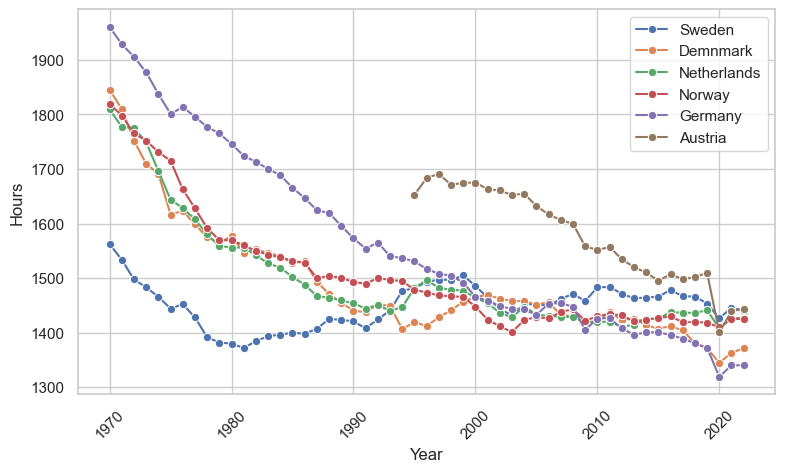

In [191]:
plt.figure(figsize=(9, 5))
ax = sns.lineplot(x="Time", y="Value", data=hrs_sweden, label="Sweden", marker="o")
sns.lineplot(x="Time", y="Value", data=hrs_denmark, label="Demnmark", marker="o")
sns.lineplot(x="Time", y="Value", data=hrs_netherlands, label="Netherlands", marker="o")
sns.lineplot(x="Time", y="Value", data=hrs_norway, label="Norway", marker="o")
sns.lineplot(x="Time", y="Value", data=hrs_germany, label="Germany", marker="o")
sns.lineplot(x="Time", y="Value", data=hrs_austria, label="Austria", marker="o")

plt.xticks(rotation=45) 
#plt.title("Avg. hours worked over time for top countries", fontsize=14)  
plt.xlabel("Year") 
plt.ylabel("Hours")  
plt.legend() 

plt.show()

In [62]:
data['Measure'].unique()

array(['National currency, current prices',
       'USD, current prices, current PPPs',
       'USD, constant prices, 2015 PPPs', 'As % of the USA (USA=100)',
       'Persons/Hours'], dtype=object)

In [67]:
data_gdp=data.loc[data['Measure']=='USD, constant prices, 2015 PPPs']
data_hrs=data.loc[data['Measure']=='Persons/Hours']

In [71]:

merged_df = pd.merge(data_gdp[['Country', 'Value']], data_hrs[['Country', 'Value']], on='Country')
merged_df.columns = ['Country', 'GDP', 'Avg Hours Worked']
print(merged_df)

          Country           GDP  Avg Hours Worked
0       Australia  52277.238536       1947.638609
1       Australia  52277.238536       1928.949093
2       Australia  52277.238536       1908.560532
3       Australia  52277.238536       1895.180538
4       Australia  52277.238536       1912.489577
...           ...           ...               ...
82255  Costa Rica  49282.579095       2127.988094
82256  Costa Rica  49282.579095       2069.245550
82257  Costa Rica  49282.579095       1929.477248
82258  Costa Rica  49282.579095       2080.563075
82259  Costa Rica  49282.579095       2155.716921

[82260 rows x 3 columns]


In [77]:
sorted_df = merged_df.sort_values(by='GDP', ascending=True)

sorted_df.reset_index(drop=True, inplace=True)

In [172]:
len(merged_df)

82260

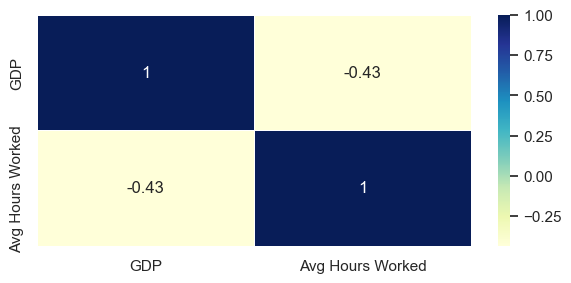

In [155]:
correlation_matrix1 = merged_df[['GDP', 'Avg Hours Worked']].corr()

plt.figure(figsize=(7,3))
sns.heatmap(correlation_matrix1, annot=True, cmap="YlGnBu", linewidths=0.5)
#plt.title('Correlation Heatmap: GDP vs. Avg Hours Worked')

plt.show()

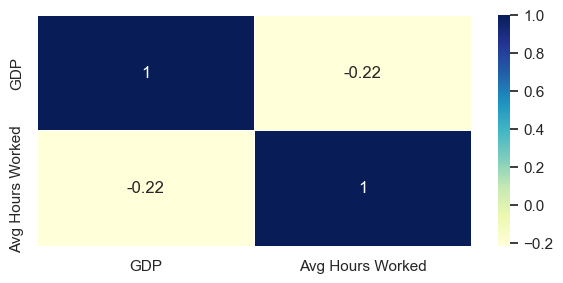

In [177]:
best_countries = sorted_df[0:20]
correlation_matrix2 = best_countries[['GDP', 'Avg Hours Worked']].corr()

plt.figure(figsize=(7,3))
sns.heatmap(correlation_matrix2, annot=True, cmap="YlGnBu", linewidths=0.5)
#plt.title('Correlation Heatmap: GDP vs. Avg Hours Worked')

plt.show()

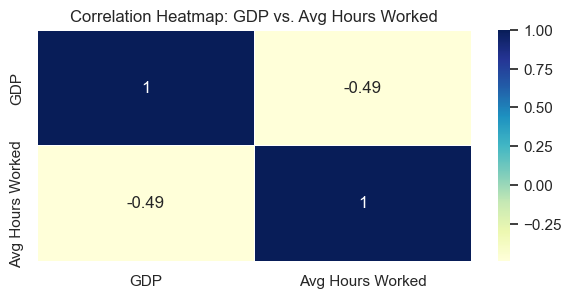

In [178]:
worst_countries = sorted_df[20:42]
correlation_matrix3 = worst_countries[['GDP', 'Avg Hours Worked']].corr()

plt.figure(figsize=(7,3))
sns.heatmap(correlation_matrix3, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Heatmap: GDP vs. Avg Hours Worked')

plt.show()

In [179]:
len(worst_countries)

22

## Nos quedamos los datos solo del ultimo año

In [22]:
data2022 = data.loc[data['Time']== 2022]

In [23]:
data2022.loc[data2022['Subject']=='GDP per person employed']['Measure'].unique()

array(['National currency, current prices',
       'USD, current prices, current PPPs',
       'USD, constant prices, 2015 PPPs', 'As % of the USA (USA=100)'],
      dtype=object)

In [24]:
data2022.head()

,Country,SUBJECT,Subject,Measure,Time,Unit Code,Unit,PowerCode,Value
211,Australia,T_GDPEMP,GDP per person employed,"National currency, current prices",2022,NATCUR,National currency,Units,184816.290470
423,Australia,T_GDPEMP,GDP per person employed,"USD, current prices, current PPPs",2022,USD,US Dollar,Units,127782.723690
635,Australia,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2022,USD,US Dollar,Units,94935.801615
847,Australia,T_GDPEMP,GDP per person employed,As % of the USA (USA=100),2022,PC,Percentage,Units,80.569761
1028,Austria,T_GDPEMP,GDP per person employed,"National currency, current prices",2022,NATCUR,National currency,Units,95718.223016


In [25]:
GDP_pp_employed=data2022[data2022['Measure']=='USD, constant prices, 2015 PPPs'].sort_values(by='Value',ascending=False)

In [26]:
GDP_pp_employed

,Country,SUBJECT,Subject,Measure,Time,Unit Code,Unit,PowerCode,Value
9915,Ireland,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2022,USD,US Dollar,Units,219137.226430
13143,Luxembourg,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2022,USD,US Dollar,Units,142580.238020
23291,United States,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2022,USD,US Dollar,Units,130507.500860
16367,Norway,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2022,USD,US Dollar,Units,120139.210080
20747,Switzerland,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2022,USD,US Dollar,Units,116637.921090
2207,Belgium,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2022,USD,US Dollar,Units,113835.489550
19899,Sweden,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2022,USD,US Dollar,Units,106655.562460
4419,Denmark,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2022,USD,US Dollar,Units,103303.449370
1390,Austria,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2022,USD,US Dollar,Units,102725.206780
6115,France,T_GDPEMP,GDP per person employed,"USD, constant prices, 2015 PPPs",2022,USD,US Dollar,Units,99217.479459


In [27]:
import plotly.graph_objs as go

In [149]:
subset_data = GDP_pp_employed[0:12]

trace1 = go.Bar(
    x=subset_data['Country'],
    y=subset_data['Value'],
    marker=dict(
        color='rgb(55, 83, 109)'  
    )
)

data = [trace1]
layout = go.Layout(
    #title='2022 GDP top countries',
    xaxis=dict(title='Countries', tickangle=30),
    yaxis=dict(title='GDP', range=[0,200000]),
    autosize=False,  
    width=500,  
    height=350, 
    margin=go.layout.Margin(
        l=50, 
        r=20, 
        b=50, 
        t=50  
    )
)

fig = go.Figure(data=data, layout=layout)

fig.show()


In [152]:
subset_data = GDP_pp_employed[30:42]

trace1 = go.Bar(
    x=subset_data['Country'],
    y=subset_data['Value'],
    marker=dict(
        color='rgb(55, 83, 109)'  
    )
)

data = [trace1]
layout = go.Layout(
    #title='2022 GDP bottom countries',
    xaxis=dict(title='Countries', tickangle=30),
    yaxis=dict(range=[0,200000]),
    autosize=False,  
    width=500,  
    height=350, 
    margin=go.layout.Margin(
        l=50, 
        r=20, 
        b=50, 
        t=50  
    )
)

fig = go.Figure(data=data, layout=layout)

fig.show()

In [29]:
len(data2022['Country'].unique())

42

In [30]:
data2022.loc[data2022['SUBJECT']=='T_HRSAV']

,Country,SUBJECT,Subject,Measure,Time,Unit Code,Unit,PowerCode,Value
29484,Australia,T_HRSAV,Average hours worked per person employed,Persons/Hours,2022,HOUR,Hours,Units,1690.885590
29870,Hungary,T_HRSAV,Average hours worked per person employed,Persons/Hours,2022,HOUR,Hours,Units,1699.521540
30285,United Kingdom,T_HRSAV,Average hours worked per person employed,Persons/Hours,2022,HOUR,Hours,Units,1531.714776
30656,Norway,T_HRSAV,Average hours worked per person employed,Persons/Hours,2022,HOUR,Hours,Units,1424.582908
30684,Austria,T_HRSAV,Average hours worked per person employed,Persons/Hours,2022,HOUR,Hours,Units,1443.720369
30998,Slovenia,T_HRSAV,Average hours worked per person employed,Persons/Hours,2022,HOUR,Hours,Units,1619.012873
31517,Estonia,T_HRSAV,Average hours worked per person employed,Persons/Hours,2022,HOUR,Hours,Units,1770.411485
31679,Slovak Republic,T_HRSAV,Average hours worked per person employed,Persons/Hours,2022,HOUR,Hours,Units,1622.066850
31957,Finland,T_HRSAV,Average hours worked per person employed,Persons/Hours,2022,HOUR,Hours,Units,1498.068704
32063,Japan,T_HRSAV,Average hours worked per person employed,Persons/Hours,2022,HOUR,Hours,Units,1606.995367


In [31]:
AVG_HRS = data2022[data2022['Measure']=='Persons/Hours'].sort_values(by='Value',ascending=False)

In [153]:
subset_data = AVG_HRS[0:10]

trace1 = go.Bar(
    x=subset_data['Country'],
    y=subset_data['Value'],
    marker=dict(
        color='rgb(55, 83, 109)'  
    )
)

data = [trace1]
layout = go.Layout(
    #title='2022 Average hours worked bottom countries',
    xaxis=dict(title='Countries', tickangle=30),
    yaxis=dict(title='Hours', range=[0,2500]),
    autosize=False,  
    width=500,  
    height=350, 
    margin=go.layout.Margin(
        l=50, 
        r=20, 
        b=50, 
        t=50  
    )
)

fig = go.Figure(data=data, layout=layout)

fig.show()


In [154]:
subset_data = AVG_HRS[28:42]

trace1 = go.Bar(
    x=subset_data['Country'],
    y=subset_data['Value'],
    marker=dict(
        color='rgb(55, 83, 109)'  
    )
)

data = [trace1]
layout = go.Layout(
    #title='2022 Average hours worked top countries',
    xaxis=dict(title='Countries', tickangle=30),
    yaxis=dict(range=[0,2500]),
    autosize=False,  
    width=500,  
    height=350, 
    margin=go.layout.Margin(
        l=50, 
        r=20, 
        b=50, 
        t=50  
    )
)

fig = go.Figure(data=data, layout=layout)

fig.show()